In [2]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
e3 = pd.read_excel(r"C:\Users\Juan\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx", sheet_name = None, index_col = 0)
e4 = pd.read_excel(r"C:\Users\Juan\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx", sheet_name = None, index_col = 0)
coord = pd.read_csv(r"C:\Users\Juan\Documents\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv")

In [7]:
lista_df_3 = []
for item in e3.keys():
    lista_df_3.append(e3[item])

In [8]:
stack = np.stack([df.values for df in lista_df_3])
stack.shape

(109, 64, 64)

In [9]:
#Filtrado
umbral = 0.5
procentaje = 0.6

#Filtro a cada matriz
above = stack>umbral


N = len(lista_df_3)
count_above = above.sum(axis = 0) #Contar cuantos valores de cada matriz supera el umbral
minimo = int(np.ceil(procentaje*N))

result_bool = count_above >= minimo
result_df = pd.DataFrame(result_bool, index=lista_df_3[0].index,
                        columns = lista_df_3[0].columns).astype(int)
result_df

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
Fc5.,0,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Fc3.,1,0,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Fc1.,1,1,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Fcz.,0,1,1,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Fc2.,0,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Po8.,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,1
O1..,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,1,1,1
Oz..,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,0,1,1
O2..,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,0,1


<Axes: >

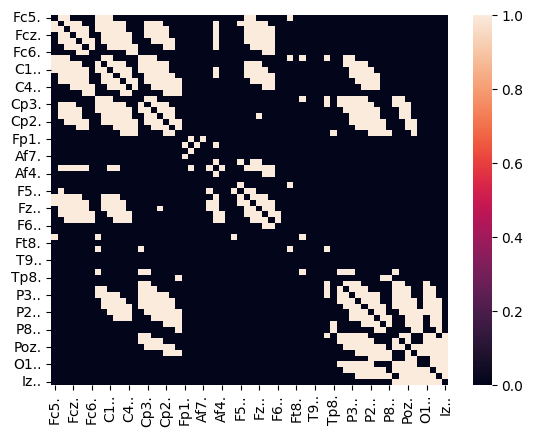

In [10]:
sns.heatmap(result_df)

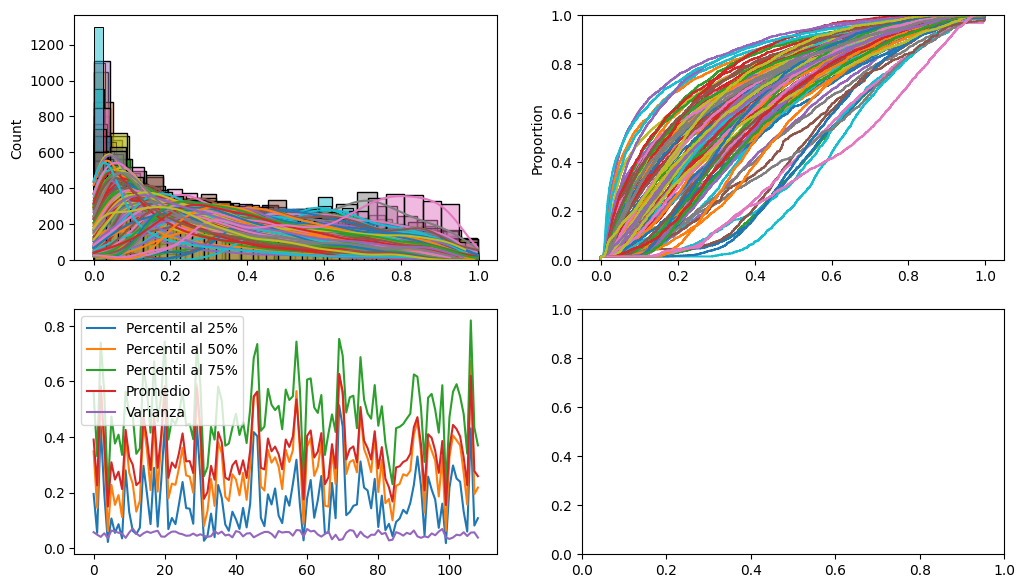

In [41]:
#Generar estadísticos para decidir umbrales

p25,p50,p75,promedio,varianza = [],[],[],[],[]

fig, axes = plt.subplots(2,2, figsize=(12,7))
for sujetos in lista_df_3:
    data = sujetos.stack().values
    #Estadísticos
    p25.append(np.percentile(data,25))
    p50.append(np.percentile(data,50))
    p75.append(np.percentile(data,75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    # Plots
    sns.histplot(sujetos.stack().values,ax=axes[0][0], kde=True)
    sns.ecdfplot(sujetos.stack().values,ax=axes[0][1])
axes[1][0].plot(p25,label = 'Percentil al 25%')
axes[1][0].plot(p50,label = 'Percentil al 50%')
axes[1][0].plot(p75,label = 'Percentil al 75%')
axes[1][0].plot(promedio,label = 'Promedio')
axes[1][0].plot(varianza,label = 'Varianza')
axes[1][0].legend()

In [94]:
estadisticos = pd.DataFrame(index = ['Min','Max','Media','p30','p75','mediana','median_abs_dv'], columns = ['p25','p50','p75',
                                                                                                           'Media'])


In [97]:
lista = [p25,p50,p75,promedio]
lista2 = ['p25','p50','p75','Media']
for estadistico,nombre in zip(lista,lista2):
    minn, maxx, mean, p30, p75_, median = min(estadistico), max(estadistico), np.mean(estadistico), np.percentile(estadistico,30), np.percentile(estadistico,75), np.median(estadistico)
    valores = [minn, maxx, mean, p30, p75_, median, 0]
    estadisticos[nombre] = valores

In [98]:
estadisticos

,p25,p50,p75,Media
Min,0.018413,0.061750,0.196867,0.149821
Max,0.514472,0.674805,0.819681,0.626848
Media,0.166961,0.295352,0.489628,0.345504
p30,0.089118,0.220086,0.432409,0.288580
p75,0.227728,0.357590,0.561877,0.402272
mediana,0.144574,0.273808,0.484181,0.327700
median_abs_dv,0.000000,0.000000,0.000000,0.000000
